# Implementation of Simple_Linear_Regression Using Gradient_Descent Algorithm 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

### Importing and Splitting of Dataset into Train and Test..

In [2]:
df = pd.read_csv(r"C:\Users\Dell\dataSets\placement.csv")
df.head(6)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99


In [3]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
X.shape, y.shape

((200,), (200,))

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [5]:
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (160,)
y_train shape :  (160,)
X_test shape :  (40,)
y_test shape :  (40,)


In [28]:
X_train,y_train

(array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
        7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
        5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
        7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
        6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
        7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
        6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
        6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
        5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
        7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
        7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
        8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
        6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
        6.06, 7.57, 8.1 , 9.16, 5.84, 

## Writing our Own SimpleGDRegressor() Class

In [115]:
class SimpleGDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 1  # weight or slop or coefficient, generally initialised with 1.
        self.b = 0  # intercept, generally initialised with 0.
        
        self.lr = learning_rate  # Setting the Learning Rate
        self.epochs = epochs  # Setting the number of Epochs or Iterations
        
    def fit(self, X_train, y_train):
        # Running for loop for each epochs..
        for i in range(self.epochs): 
            # Finding slopes of loss_function using partial differentiation by m and b, i.e. dl/dm & dl/db
            loss_slope_b = -2 * np.sum(y_train - self.m * X_train.ravel() - self.b)
            loss_slope_m = -2 * np.sum(y_train - self.m * X_train.ravel() - self.b)
            
            # Updating slope(m) and intercept(b) in each epochs..
            self.b = self.b - (self.lr * loss_slope_b)  # b(new) = b(old) - (learnig_rate * dl/db)
            self.m = self.m - (self.lr * loss_slope_m)  # m(new) = m(old) - (learnig_rate * dl/dm)
          
        print("Co-efficient/Weights : ", self.m)
        print("Intercept : ", self.b)
        
    def predict(self, X_test):
        return self.m * X_test + self.b

In [149]:
# Building Model with our own SimpleGDRegressor() Class..
sgd = SimpleGDRegressor(learning_rate = 0.00009, epochs = 100)
# sgd = SimpleGDRegressor(learning_rate = 0.0001, epochs = 100)

sgd.fit(X_train, y_train)  # Learning from data..

Co-efficient/Weights :  0.4999724459376466
Intercept :  -0.5000275540623539


In [150]:
# predicting values from test data.
y_pred = sgd.predict(X_test)
y_pred

array([3.19476882, 3.99472473, 3.28476386, 3.6397443 , 3.03977736,
       2.55980382, 2.05983137, 2.86478701, 2.46980877, 3.23476662,
       3.17476992, 3.1697702 , 2.9247837 , 4.18971399, 3.5997465 ,
       3.30976248, 3.20976799, 3.21476772, 3.05977626, 3.09977406,
       2.59480189, 3.65474347, 2.92978343, 3.60474623, 2.73479417,
       2.89478535, 3.15977075, 2.18982421, 2.41981153, 1.62985507,
       3.13977185, 3.1897691 , 2.4748085 , 2.87978618, 4.28970848,
       4.1297173 , 2.9647815 , 4.01972336, 2.9647815 , 2.76479252])

In [151]:
# Checking score of the Algorithm..
r2_score(y_test, y_pred)

0.7922049166849903

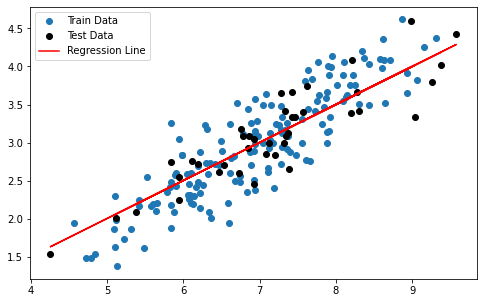

In [154]:
# Plotting The Graph..
plt.figure(figsize = (8,5))
plt.scatter(X_train, y_train, label = 'Train Data')
plt.scatter(X_test, y_test, label = 'Test Data', color = 'black')
plt.plot(X_test, y_pred, color = 'r', label ='Regression Line')
plt.legend()
plt.show()

### Comparing our Class with Scikit-Learn's LinearRegression() Class..

In [156]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [157]:
lr.coef_, lr.intercept_

(array([[0.59340915]]), array([-1.14837897]))

In [161]:
y_pred2 = lr.predict(X_test.reshape(-1,1))

In [162]:
r2_score(y_test, y_pred2)

0.7576283066961194